In [1]:
#We import our csv dataset.

from google.colab import files

UploadedFiles = files.upload()

Saving diabetic_data.csv to diabetic_data (1).csv


In [2]:
# Importing our libraries.

import pandas as pd

import matplotlib.pyplot as plt
!pip install fastai
import fastai
import sklearn as sk
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import seaborn as sns
import scipy as sc
import random
import sklearn.preprocessing as skp
!pip install miceforest 
!pip install tensorflow
!pip install pyspark
!pip install scipy

import miceforest as mf

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pyspark as pys
import scipy as sc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Naming our columns 
columnas = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [5]:
#Reading our database and analyzing the different dtypes.

csv_file = pd.read_csv('diabetic_data.csv', sep = ',', engine='python')



In [6]:
csv_file.dtypes


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
#As we can see, most of our features are labelled as objects.
#In order to work with miceforest, this is suboptimal.
#As a result, we will asign a correct dtype to each feature.

csv_file = csv_file.astype({'race':'category', 'gender':'category', 'age':'category', 
                'payer_code':'category', 'medical_specialty':'category', 
                'diag_1':'category', 'diag_2' : 'category', 'diag_3': 'category', 
                'max_glu_serum':'category', 'A1Cresult':'category', 'metformin':'category',
                'repaglinide':'category', 'nateglinide':'category', 'chlorpropamide':'category',
                'glimepiride':'category', 'acetohexamide':'category', 'glipizide':'category', 
                'glyburide':'category', 'tolbutamide':'category', 'pioglitazone':'category',
                'rosiglitazone':'category', 'acarbose':'category', 'miglitol':'category',
                'troglitazone':'category', 'tolazamide':'category', 'examide':'category',
                'citoglipton':'category', 'insulin':'category', 'glyburide-metformin':'category',
                'glipizide-metformin':'category', 'glimepiride-pioglitazone':'category',
                'metformin-rosiglitazone':'category', 'metformin-pioglitazone':'category',
                'change':'category', 'diabetesMed': 'category', 'readmitted':'category'})

csv_file.dtypes

encounter_id                   int64
patient_nbr                    int64
race                        category
gender                      category
age                         category
weight                        object
admission_type_id              int64
discharge_disposition_id       int64
admission_source_id            int64
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
c

In [8]:
csv_file.head(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
# We will change ? values to NaN to effectively count our NaN values.
csv_file = csv_file.replace('?', np.nan)
#csv_file.head(20)

In [10]:
csv_file.shape
#Obtaining the shape of our dataset and counting the NaN values.

(101766, 50)

In [11]:
csv_file.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

As we can see, we have the following percentages of NaN values:   
    **race = 2.23%**   
    **diag_1 = 0.02%**   
    **diag_2 = 0.35%**   
    **diag_3 = 1.39%**   
    **weight = 96.85%**   
    **payer_code = 39.55%**   
    **medical_specialty = 49.08%**   

To deal with them, we have taken the following decissions:  

   To work with values lower than 3%, we will delete the rows (patients) that generate them (at columns associated to race, diag_1, diag_2, diag_3); as a result, we will assume those values were **lost completely at random**. 
   To work with values higher than 95%, we will delete the columns associated to them (weight)   
   Otherwise, given the relatively low relevance that the columns have in relation to readmission in hospitals (payer_code, medical_specialty) and the relatively high amount of NaN values (between 40 and 50 %), **we will use a miceforest**.



In [1]:
#We will delete weight column

csv_file = csv_file.drop('weight', axis = 'columns') 
csv_file.head(20)

NameError: name 'csv_file' is not defined

In [14]:
#Searching patients that generate NaN values at the desired columns and deleting NaN values. 

csv_file.dropna(subset = ['race', 'diag_1', 'diag_2', 'diag_3'], inplace = True) 
csv_file.head(30)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,NaN,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [15]:
#AUpdating our columns
columnas = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty','payer_code',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

In [16]:
#Deleting payer_code column
csv_file = csv_file.drop('payer_code', axis = 'columns') 
csv_file.head(30)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,NaN,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [17]:
#Updating columns one more time
columnas = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

In [18]:
#Finally, we will delete the first two columns, as the data is mostly related to the ID of the patients.
csv_file = csv_file.drop('encounter_id', axis = 'columns') 
csv_file = csv_file.drop('patient_nbr', axis = 'columns') 
csv_file.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,NaN,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,NaN,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,NaN,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,NaN,31,6,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,NaN,70,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1,1,7,5,NaN,73,0,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2,1,4,13,NaN,68,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,33,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,AfricanAmerican,Female,[40-50),1,1,7,9,NaN,47,2,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [19]:
#Updating columns
columnas = ['race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

# Feature engineering.

As we can see, there is a huge amount of categories whose medical specialty is almost irrelevant whereas others which are more common. As a result, we will delete the irrelevant categories and, afterwards, use a One Hot Encoding before applying our miceforest.    

We will take Dermatology, Surgery-Plastic, Proctology, Psychiatry-Addictive and Sports Medcicine, at least at this moment, so they can be merged on an unique category named Others. Finally, we will merge those categories that are similar among them.    

|Specialty| |Number of patients|   
|---|---|   
| **Cardiology**  | **5218**  |   
| **Pulmonology** | **832**  |   
| **Otolaryngology**  |**111**  |   
| **Podiatry**   | **90**  |    
| **Hematology**  | **82**  |    
| **Ophthalmology**  | **35**  |    
| **InfectiousDiseases** | **34**  |    
| **PhysicianNotFound** | **10**  |     


Taking into account that we are missing data for almost 0.5% of patients, we will not delete almost any specialty, at least until we can see what happens after the miceforest. PhysicianNotFound will be converted into NaN to be predicted, Resident and Dermatology will definitely be deleted (1 and 6 patients each)


We will merge into Surgery the following categories:      
|Specialty| |Number of patients |   
|---|---|   
|  **Surgery-PlasticwithinHeadandNeck**  |  **1**  |   
|  **Surgery-Pediatric**  | **7** |   
|  **Surgery-Maxillofacial**  |  **10**  |     
|  **Surgery-Colon&Rectal**  |  **11**  |   
|  **Surgery-Plastic**  |  **38**  |   
|  **Surgeon**  |  **45**  |   
|  **Surgery-Thoracic**  |  **107**  |   
|  **Surgery-Cardiovascular**  |  **97**  |   
|  **Surgery-Vascular**  |  **524**  |   
|  **Surgery-Neuro**  |  **426**  |   
|  **Surgery-Cardiovascular/Thoracic**  |  **625**  |   
|  **Surgery-General**  |  **2969**  |   
|  **SurgicalSpecialty**  |  **32**  |   

We will merge into Pediatry and General Practice the following categories:   
|Specialty||Number of patients|   
|----|----|   
|   **Pediatrics-EmergencyMedicine**  |   **2**|   
|   **Pediatrics-InfectiousDiseases**  |   **1**|   
|   **Pediatrics-AllergyandImmunologys**  |   **3**|   
|   **Pediatrics-Hematology-Oncologys**  |   **4**|   
|   **Pediatrics-Neurologys**  |   **10**|   
|   **Pediatrics-Pulmonologys**  |   **25**|   
|   **Pediatrics-Endocrinologys**  |   **42**|   
|   **Pediatricss**  |   **202**|   
|   **Family/GeneralPractices**  |   **7140**|   
|   **Cardiology-Pediatrics**  |   **5**|   
|   **Hospitalists**  |   **55**|   

We will merge into Internal Medicine the following categories:      
|Specialty||Number of patients|   
|----|----|   
|   **SportsMedicine**  |   **1**|   
|   **Endocrinology-Metabolism**  |   ** 8**|   
|   **Endocrinology**  |   **114**|   
|   **InternalMedicine**  |   **13967**|   

We will merge into Critical Care the following categories:   
|Specialty||Number of patients|   
|----|----|      
|   **Pediatrics-CriticalCare**  |   **38**|      
|   **Emergency/Trauma**  |   **7472**|   
|   **Anesthesiology-Pediatric**  |   **12**|   

We will merge into Others the following categories:   
|Specialty||Number of patients|   
|----|----|   
|   **Dentistry**  |   **4**|   
|   **Speech**  |   **1**|   
|   **OutreachServices**  |   **12**|   
|   **AllergyandImmunology**  |   **7**|   
|   **Pathology**  |   **17**|   
|   **Rheumatology**  |   **16**|   
|   **Anesthesiology**  |   **11**|   
|   **DCPTEAM**  |   **6**|   

We will merge into Radiology the following categories:   
|Specialty||Number of patients|   
|----|----|   
|   **Radiologist**  |   **1115**|   
|   **Radiology**  |   **48**|   

We will merge into Ginecology Obstetrics the following categories:   
|Specialty||Number of patients|   
|----|----|   
|   **ObstetricsandGynecology**  |   **634**|   
|   **Perinatology**  |   **1**|   
|   **Obsterics&Gynecology-GynecologicOnco**  |   **24**|   
|   **Obstetrics**  |   **19**|   

We will merge into Gastrovascular the following categories:   
|Specialty||Number of patients|   
|----|----|   
|   **Gastroenterology**  |   **556**|   
|   **Proctology**  |   **1**|   
|   **Gynecology**  |   **53**|   

We will merge into Brain-related the following categories:   
|Specialty||Number of patients|   
|----|----|   
|   **Psychiatry-Child/Adolescent**  |   **7**|   
|   **Psychiatry**  |   **821**|   
|   **Neurology**  |   **196**|   
|   **Psychology**  |   **91**|   
|   **Psychiatry-Addictive**  |   **1**|   
|   **Neurophysiology**  |   **1**|   

We will merge into Nephro/Urology the following categories:   
|Specialty||Number of patients|   
|----|----|   
|   **Nephrology**  |   **1581**|   
|   **Urology**  |   **636**|   

We will merge into Oncology the following categories:   
|Specialty||Number of patients|   
|----|----|   
|   **Oncology**  |   **344**|   
|   **Hematology/Oncology**  |   **199**|   

We will merge into Orthopedics and PhysicalTherapy the following categories:   
|Specialty||Number of patients|   
|----|----|   
|   **Orthopedics**  |   **1355**|   
|   **Orthopedics-Reconstructive**  |   **1150**|   
|   **Osteopath**  |   **39**|   
|   **PhysicalMedicineandRehabilitation**  |   **382**|   

After this EDA, we are merging 72 categories into 20; as a result, One-Hot-Encoding is much more feasible so we do not have to take into account the possibility of facing the curse of dimensionality.

In [21]:
#pd.set_option("display.max_rows", None, "display.max_columns", None) just to show the totality of results

#csv_file['medical_specialty'].value_counts() #counting values per columns
#csv_file['medical_specialty'].cat.rename_categories({}) #renaming columns list               
#First, we will delte the patients that belong to PhysicianNotFound, Resident
#and Dermatology as they are not giving much more value to our data.


csv_file.drop(95599, axis = 0, inplace = True)
csv_file.drop(95822, axis = 0, inplace = True)
csv_file.drop(42553, axis = 0, inplace = True)



In [22]:
csv_file['medical_specialty'].replace(['PhysicianNotFound'], np.nan, inplace = True)

In [23]:
#After converting into NaN PhysicianNotFound and deleting the patients
#we are not interested into, we will proceed to join the interesting columns. Afterwards, we will
#encode everything and pass it to miceforest.

In [24]:
#Empezamos con Surgery
lists = ['Surgery-PlasticwithinHeadandNeck', 'Surgery-Pediatric', 'Surgery-Maxillofacial', 
        'Psychiatry-Addictive', 'Surgery-Colon&Rectal', 'Surgery-Plastic', 'Surgeon', 
        'Surgery-Thoracic', 'Surgery-Cardiovascular', 'Dermatology', 'Surgery-Plastic', 
        'Surgery-Vascular', 'Surgery-Vascular', 'Surgery-Neuro', 'Dermatology', 'Surgery-Plastic',
        'Surgery-General', 'SurgicalSpecialty', 'Surgery-Cardiovascular/Thoracic']

for elem in lists:
    csv_file['medical_specialty'].replace([elem], 'Surgery', inplace = True)

In [25]:
#csv_file[csv_file['medical_specialty'] == 'Surgery'] Testing whether the last cell does what we want.

In [26]:
#Following up with Pediatry and General Practice
lists = ['Pediatrics-EmergencyMedicine', 'Pediatrics-InfectiousDiseases', 'Pediatrics-AllergyandImmunology',
        'Pediatrics-Hematology-Oncology', 'Pediatrics-Neurology', 'Pediatrics-Pulmonology', 'Pediatrics-Endocrinology ',
        'Pediatrics', 'Surgery-Cardiovascular', 'Family/GeneralPractice', 'Cardiology-Pediatric', 'Hospitalist' ]

for elem in lists:
    csv_file['medical_specialty'].replace([elem], 'Pediatry-and-General-Practice', inplace = True)


In [27]:
#csv_file[csv_file['medical_specialty'] == 'Pediatry-and-General-Practice'] Testing whether the last cell does what we want.

In [28]:
#Internal Medicine
csv_file['medical_specialty'].replace(['Endocrinology-Metabolism'], 'Internal-Medicine', inplace = True)
csv_file['medical_specialty'].replace(['Endocrinology'], 'Internal-Medicine', inplace = True)
csv_file['medical_specialty'].replace(['InternalMedicine'], 'Internal-Medicine', inplace = True)



In [29]:
#csv_file[csv_file['medical_specialty'] == 'Internal-Medicine'] Testing whether the last cell does what we want.

In [30]:
#Critical Care

csv_file['medical_specialty'].replace(['Pediatrics-CriticalCare'], 'Critical-Care', inplace = True)
csv_file['medical_specialty'].replace(['Emergency/Trauma'], 'Critical-Care', inplace = True)



In [31]:
#csv_file[csv_file['medical_specialty'] == 'Critical-Care'] Testing whether the last cell does what we want.

In [32]:
#Others

lists = ['Dentistry', 'Speech', 'OutreachServices', 'AllergyandImmunology', 'SportsMedicine', 
        'Pathology', 'Rheumatology', 'Anesthesiology', 'Anesthesiology-Pediatric', 'DCPTEAM',
        'InfectiousDiseases', 'Otolaryngology', 'Radiologist', 'Radiology']
for elem in lists:
    csv_file['medical_specialty'].replace([elem], 'Others', inplace = True)


In [33]:
#csv_file[csv_file['medical_specialty'] == 'Others'] Testing whether the last cell does what we want.

In [34]:
#Ginecology and Obstetrics

csv_file['medical_specialty'].replace(['ObstetricsandGynecology'], 'Ginecology-Obstetrics', inplace = True)
csv_file['medical_specialty'].replace(['Perinatology'], 'Ginecology-Obstetrics', inplace = True)
csv_file['medical_specialty'].replace(['Obsterics&Gynecology-GynecologicOnco'], 'Ginecology-Obstetrics', inplace = True)
csv_file['medical_specialty'].replace(['Obstetrics'], 'Ginecology-Obstetrics', inplace = True)

In [35]:
#csv_file[csv_file['medical_specialty'] == 'Ginecology-Obstetrics'] Testing whether the last cell does what we want.

In [36]:
#Gastrovascular

csv_file['medical_specialty'].replace(['Gastroenterology'], 'Gastrovascular', inplace = True)
csv_file['medical_specialty'].replace(['Proctology'], 'Gastrovascular', inplace = True)
csv_file['medical_specialty'].replace(['Gynecology'], 'Gastrovascular', inplace = True)

In [37]:
#csv_file[csv_file['medical_specialty'] == 'Gastrovascular'] Testing whether the last cell does what we want.

In [38]:
#Brain-related

csv_file['medical_specialty'].replace(['Psychiatry-Child/Adolescent'], 'Brain-related', inplace = True)
csv_file['medical_specialty'].replace(['Psychiatry'], 'Brain-related', inplace = True)
csv_file['medical_specialty'].replace(['Neurology'], 'Brain-related', inplace = True)
csv_file['medical_specialty'].replace(['Psychology'], 'Brain-related', inplace = True)
csv_file['medical_specialty'].replace(['Surgery-Plastic'], 'Brain-related', inplace = True)
csv_file['medical_specialty'].replace(['Psychiatry-Addictive'], 'Brain-related', inplace = True)
csv_file['medical_specialty'].replace(['Neurophysiology'], 'Brain-related', inplace = True)

In [39]:
#csv_file[csv_file['medical_specialty'] == 'Brain-related'] Testing whether the last cell does what we want.

In [40]:
#Nephro-Urology

csv_file['medical_specialty'].replace(['Nephrology'], 'Nephro-Urology', inplace = True)
csv_file['medical_specialty'].replace(['Urology'], 'Nephro-Urology', inplace = True)

In [41]:
#csv_file[csv_file['medical_specialty'] == 'Nephro-Urology'] Testing whether the last cell does what we want.

In [42]:
#Oncology

csv_file['medical_specialty'].replace(['Oncology'], 'Oncology', inplace = True)
csv_file['medical_specialty'].replace(['Hematology/Oncology'], 'Oncology', inplace = True)

In [43]:
#csv_file[csv_file['medical_specialty'] == 'Oncology'] Testing whether the last cell does what we want.

In [44]:
#Orthopedics-Physical-Therapy

csv_file['medical_specialty'].replace(['Orthopedics'], 'Orthopedics-Physical-Therapy', inplace = True)
csv_file['medical_specialty'].replace(['Orthopedics-Reconstructive'], 'Orthopedics-Physical-Therapy', inplace = True)
csv_file['medical_specialty'].replace(['Osteopath'], 'Orthopedics-Physical-Therapy', inplace = True)
csv_file['medical_specialty'].replace(['PhysicalMedicineandRehabilitation'], 'Orthopedics-Physical-Therapy', inplace = True)
csv_file['medical_specialty'].replace(['SportsMedicine'], 'Orthopedics-Physical-Therapy', inplace = True)

In [45]:
#csv_file[csv_file['medical_specialty'] == 'Orthopedics-Physical-Therapy'] Testing whether the last cell does what we want.

In [46]:
#Testing whether the we have our desired 20 categories
csv_file['medical_specialty']
csv_file['medical_specialty'].cat.categories

Index(['Cardiology', 'Others', 'Internal-Medicine', 'Gastrovascular',
       'Hematology', 'Nephro-Urology', 'Ginecology-Obstetrics', 'Oncology',
       'Ophthalmology', 'Orthopedics-Physical-Therapy', 'Critical-Care',
       'Pediatry-and-General-Practice', 'Pediatrics-Endocrinology', 'Podiatry',
       'Brain-related', 'Pulmonology', 'Resident', 'Surgery'],
      dtype='object')

In [47]:
#We will now proceed to encode our features. As a result, we will divide age
#in 3 groups : 0, 1 y 2, where 0 will relate to young adults, kids and adolescents (0-30), adults will relate
#to (30-60) time span and older people will relate to the rest.

csv_file['age'].replace(['[0-10)'], 'youngadult-kid-ado', inplace = True)
csv_file['age'].replace(['[10-20)'], 'youngadult-kid-ado', inplace = True)
csv_file['age'].replace(['[20-30)'], 'youngadult-kid-ado', inplace = True)
csv_file['age'].replace(['[30-40)'], 'adult', inplace = True)
csv_file['age'].replace(['[40-50)'], 'adult', inplace = True)
csv_file['age'].replace(['[50-60)'], 'adult', inplace = True)
csv_file['age'].replace(['[60-70)'], 'elder', inplace = True)
csv_file['age'].replace(['[70-80)'], 'elder', inplace = True)
csv_file['age'].replace(['[80-90)'], 'elder', inplace = True)
csv_file['age'].replace(['[90-100)'], 'elder', inplace = True)

On the other hand, we have a lot of categories in diag_1, diag_2 y diag_3 (between 700 and 800). A One-Hot-Encoding
procedure would result in curse of dimensionality; as a result, we will opt to divide them following the recommendations of this resources:    
https://www.hindawi.com/journals/bmri/2014/781670/tab2/  
https://www.hindawi.com/journals/bmri/2014/781670/tab3/ 

The division has been made as follows:
   
    1.Circulatory → 390–459, 785 → Diseases of the circulatory system   
    2.Respiratory → 460–519, 786 → Diseases of the respiratory system   
    3.Digestive → 520–579, 787 → Diseases of the digestive system   
    4.Diabetes → 250.xx → Diabetes mellitus   
    5.Injury → 800–999 → Injury and poisoning   
    6.Musculoskeletal → 710–739 → Diseases of the musculoskeletal system and connective tissue   
    7.Genitourinary → 580–629, 788 → Diseases of the genitourinary system  
    8.Neoplasms → 140–239 → Neoplasms   
    9.Pregnecy → 630–679 → Complications of pregnancy, childbirth, and the puerperium   
    10.Other  

In [48]:
csv_file['diag_1'] = csv_file['diag_1'].apply(lambda x : 'Others_diag1' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('Cardiovascular_diag1' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('Respiratory_diag1' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('Digestive_diag1'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('Diabetes_diag1'    if int(float(x)) == 250
                                        else     ('Injury_diag1'      if int(float(x)) in range(800, 1000)
                                        else ('Musculoskeletal_diag1' if int(float(x)) in range(710, 740)
                                        else ('Genitourinary_diag1'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('Neoplasms_diag1'       if int(float(x)) in range(140, 240)
                                        else ('Pregnancy_diag1'        if int(float(x)) in range(630, 680)
                                        else 'Others_diag1'))))))))))
csv_file['diag_2'] = csv_file['diag_2'].apply(lambda x : 'Others_diag2' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('Circulatory_diag2' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('Respiratory_diag2' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('Digestive_diag2'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('Diabetes_diag2'    if int(float(x)) == 250
                                        else     ('Injury_diag2'      if int(float(x)) in range(800, 1000)
                                        else ('Musculoskeletal_diag2' if int(float(x)) in range(710, 740)
                                        else ('Genitourinary_diag2'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('Neoplasms_diag2'       if int(float(x)) in range(140, 240)
                                        else ('Pregnancy_diag2'        if int(float(x)) in range(630, 680)
                                        else 'Others_diag2'))))))))))
csv_file['diag_3'] = csv_file['diag_3'].apply(lambda x : 'Others_diag3' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('Circulatory_diag3' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('Respiratory_diag3' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('Digestive_diag3'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('Diabetes_diag3'    if int(float(x)) == 250
                                        else     ('Injury_diag3'      if int(float(x)) in range(800, 1000)
                                        else ('Musculoskeletal_diag3' if int(float(x)) in range(710, 740)
                                        else ('Genitourinary_diag3'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('Neoplasms_diag3'       if int(float(x)) in range(140, 240)
                                        else ('Pregnancy_diag3'        if int(float(x)) in range(630, 680)
                                        else 'Others_diag3'))))))))))

In [49]:
csv_file['diag_1'] #Testing whether the last cell does what we want.

1                 Others_diag1
2              Pregnancy_diag1
3                 Others_diag1
4              Neoplasms_diag1
5         Cardiovascular_diag1
                  ...         
101761          Diabetes_diag1
101762         Digestive_diag1
101763            Others_diag1
101764            Injury_diag1
101765         Digestive_diag1
Name: diag_1, Length: 98050, dtype: object

In [50]:
csv_file['diag_2']

1              Diabetes_diag2
2              Diabetes_diag2
3              Diabetes_diag2
4             Neoplasms_diag2
5           Circulatory_diag2
                 ...         
101761           Others_diag2
101762           Others_diag2
101763    Genitourinary_diag2
101764           Others_diag2
101765        Digestive_diag2
Name: diag_2, Length: 98050, dtype: object

In [51]:
csv_file['diag_3'] 

1              Others_diag3
2              Others_diag3
3         Circulatory_diag3
4            Diabetes_diag3
5            Diabetes_diag3
                ...        
101761    Circulatory_diag3
101762      Digestive_diag3
101763         Others_diag3
101764         Injury_diag3
101765      Digestive_diag3
Name: diag_3, Length: 98050, dtype: object

In [52]:
csv_file['diag_1'] = csv_file['diag_1'].astype('category')
csv_file['diag_2'] = csv_file['diag_2'].astype('category')
csv_file['diag_3'] = csv_file['diag_3'].astype('category')


In [53]:
csv_file['medical_specialty'] = csv_file['medical_specialty'].cat.remove_categories('Resident')
csv_file['medical_specialty'].cat.categories

Index(['Cardiology', 'Others', 'Internal-Medicine', 'Gastrovascular',
       'Hematology', 'Nephro-Urology', 'Ginecology-Obstetrics', 'Oncology',
       'Ophthalmology', 'Orthopedics-Physical-Therapy', 'Critical-Care',
       'Pediatry-and-General-Practice', 'Pediatrics-Endocrinology', 'Podiatry',
       'Brain-related', 'Pulmonology', 'Surgery'],
      dtype='object')

In [54]:
#5,6 and 8 are equivalent to NaN. We will encode as that and remove the corresponding categories.
csv_file['admission_type_id'] = csv_file['admission_type_id'].apply(lambda x : np.nan if x == 5
                                                   else (np.nan if x == 6
                                                        else (np.nan if x == 8
                                                             else ('0' if x == 1
                                                                  else ('1' if x == 2
                                                                       else ('2' if x == 3
                                                                            else ('3' if x == 4
                                                                                  else '4')))))))


In [55]:
csv_file['discharge_disposition_id'].value_counts()

1     57608
3     13564
6     12625
18     3624
2      2049
22     1970
11     1606
5      1127
25      941
4       756
7       592
23      400
13      396
14      368
28      137
8       106
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [56]:
# 18 and 25 are equivalent to NaN. 
# 2,3, 4, 5, 14, 22, 23, 24, 27, 28 relate to "discharged/transferred to another hospital" 0
#6, 8, 13, 1 relate to "discharged home" 1
#10, 11, 19, 20, 21 relate to "expired" 4
# 12, 15, 16, 17 relate to "outpatient services" 5
csv_file['discharge_disposition_id'] = csv_file['discharge_disposition_id'].apply(lambda x : np.nan if x == 18
    else (np.nan if x == 25
         else ('0' if x == 2 
              else ('0' if x == 3
                   else ('0' if x == 4
                        else ('0' if x == 5
                             else ('0' if x == 14
                                  else ('0' if x == 22
                                       else ('0' if x == 23
                                            else ('0' if x == 24
                                                 else ('0' if x == 27
                                                      else ('0' if x == 2
                                                           else ('1' if x == 6
                                                                else ('1' if x == 8
                                                                     else ('1' if x == 13
                                                                          else ('2' if x == 7
                                                                               else ('3' if x == 9
                                                                                    else ('4' if x == 10
                                                                                        else ('4' if x == 11
                                                                                             else ('4' if x == 19
                                                                                                  else ('4' if x == 20
                                                                                                       else ('4' if x == 21
                                                                                                            else ('5' if x == 12
                                                                                                                 else ('5' if x == 15
                                                                                                                      else ('5' if x == 16
                                                                                                                           else ('5' if x == 17
                                                                                                                                else ('6' if x == 29
                                                                                                                                     else '7')))))))))))))))))))))))))))
                                                                                                                      


In [57]:
csv_file['discharge_disposition_id'].value_counts()

7    57745
0    20287
1    13127
4     1622
2      592
5       91
3       21
Name: discharge_disposition_id, dtype: int64

In [58]:
csv_file['admission_source_id'].value_counts()

#9, 17, 15, 20 and 21 are equivalent to NaN. 
#1, 2 y 3 relate to Referral 0
#4,5,6,10,18, 22,25,26 relate to transfer 1
#11,12,13,14 relate to delivery (baby) 4
csv_file['admission_source_id'] = csv_file['admission_source_id'].apply(lambda x : np.nan if x == 18
    else (np.nan if x == 9
         else (np.nan if x == 17
              else (np.nan if x == 15
                   else (np.nan if x == 20
                        else (np.nan if x == 21
                             else ('0' if x == 1
                                  else ('0' if x == 2
                                       else ('0' if x == 3
                                            else ('1' if x == 4
                                                 else ('1' if x == 5
                                                      else ('1' if x == 6
                                                           else ('1' if x == 10
                                                                else ('1' if x == 18
                                                                     else ('1' if x == 22
                                                                          else ('1' if x == 25
                                                                               else ('1' if x == 26
                                                                                    else ('2' if x == 7
                                                                                        else ('3' if x == 8
                                                                                             else ('4' if x == 11
                                                                                                  else ('4' if x == 12
                                                                                                       else ('4' if x == 13
                                                                                                            else ('4' if x == 14
                                                                                                                 else ('4' if x == 15
                                                                                                                      else ('5' if x == 19
                                                                                                                           else ('6' if x == 23
                                                                                                                                     else '7'))))))))))))))))))))))))))
                                                                                                                      


In [59]:
csv_file['admission_source_id'].value_counts()

csv_file['admission_type_id'] = csv_file['admission_type_id'].astype('float64')
csv_file['admission_source_id'] = csv_file['admission_source_id'].astype('float64')
csv_file['discharge_disposition_id'] = csv_file['discharge_disposition_id'].astype('float64')

In [60]:
csv_file.dtypes

race                        category
gender                      category
age                         category
admission_type_id            float64
discharge_disposition_id     float64
admission_source_id          float64
time_in_hospital               int64
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
g

In [61]:
csv_file.dtypes

race                        category
gender                      category
age                         category
admission_type_id            float64
discharge_disposition_id     float64
admission_source_id          float64
time_in_hospital               int64
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
g

In [70]:
#Deleting unused category at metformin-rosiglitazone

print(csv_file['metformin-rosiglitazone'].value_counts())
csv_file["metformin-rosiglitazone"] = csv_file["metformin-rosiglitazone"].cat.remove_categories("Steady")
print(csv_file['metformin-rosiglitazone'].value_counts())

No        98050
Steady        0
Name: metformin-rosiglitazone, dtype: int64
No    98050
Name: metformin-rosiglitazone, dtype: int64


In [71]:
#We have decided to employ MICE algorithm (multiple imputation by chained equations) to deal with missing values.


#Creating MICE's kernel, using three datasets to be compared. 
#We will convert our dataset to numpy.dataframe to improve time of computation, as recommended at the
#documentation https://pypi.org/project/miceforest/
kernel = mf.ImputationKernel(
csv_file,
save_all_iterations=True,
random_state=1, 
)

kernel.mice(3)
csv_file = kernel.complete_data(dataset=0, inplace=False)
  


print(csv_file.isnull().sum(0))

#kernel.plot_imputed_distributions(wspace=0.35,hspace=0.4)
csv_file.head(20) #para comprobar que el print anterior es real.

/usr/local/lib/python3.8/dist-packages/miceforest/ImputationKernel.py:371: UserWarning: [gender,medical_specialty,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazo

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,youngadult-kid-ado,0.0,7.0,2.0,3,Critical-Care,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,youngadult-kid-ado,0.0,7.0,2.0,2,Nephro-Urology,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,adult,0.0,7.0,2.0,2,Internal-Medicine,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,adult,0.0,7.0,2.0,1,Internal-Medicine,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,adult,1.0,7.0,0.0,3,Cardiology,31,6,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,elder,2.0,7.0,0.0,4,Surgery,70,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,elder,0.0,7.0,2.0,5,Pediatry-and-General-Practice,73,0,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,elder,1.0,7.0,1.0,13,Internal-Medicine,68,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,elder,2.0,0.0,1.0,12,Internal-Medicine,33,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,AfricanAmerican,Female,adult,0.0,7.0,2.0,9,Internal-Medicine,47,2,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [72]:
#-------RACE-------

#We have an imbalance between Caucasics (78% of people vs an average of 60% nationally) and Latino 
#(5% vs a 19% nationally)

#One possible option could be to generate aditional data
#using libraries such as this one. https://pypi.org/project/sdv/



csv_file['race'] = csv_file['race'].apply(lambda x : 0 if x == 'Caucasian'
                                                   else (1 if x == 'AfricanAmerican'
                                                        else (2 if x == 'Hispanic'
                                                             else (3 if x == 'Other'
                                                                  else 4))))
csv_file['race'].value_counts()


0    75077
1    18881
2     1984
3     1483
4      625
Name: race, dtype: int64

In [73]:
#-------------GENDER-------------
csv_file['gender'].value_counts()
#Gender is quite balanced; we have opt out to delete the unknown value of gender. It was invalid,
#and it is very probable that it is not representative of other gender identities (LGBT+).

#Women percentage: 53.88
#Men percentage: 46.12


csv_file[csv_file['gender'] == 'Unknown/Invalid']
csv_file.drop(30506, inplace = True) #solo se ejecuta una vez
#csv_file[csv_file['gender'] == 'Unknown/Invalid']
csv_file['gender'].cat.remove_categories('Unknown/Invalid', inplace = True) 
csv_file['gender'] = csv_file['gender'].apply(lambda x : 0 if x == 'Male'
                                                   else 1)

csv_file['gender'].value_counts()

<ipython-input-73-5afb5affa852>:17: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  csv_file['gender'].cat.remove_categories('Unknown/Invalid', inplace = True) #Solo se ejecuta una vez


1    52832
0    45217
Name: gender, dtype: int64

In [74]:
#OneHotEncoding Age feature
dummy = pd.get_dummies(csv_file['age'])
csv_file = csv_file.join(dummy).drop(columns = 'age') 
csv_file.head(10)   

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,youngadult-kid-ado,adult,elder
1,0,1,0.0,7.0,2.0,3,Critical-Care,59,0,18,...,No,No,No,No,Ch,Yes,>30,1,0,0
2,1,1,0.0,7.0,2.0,2,Nephro-Urology,11,5,13,...,No,No,No,No,No,Yes,NO,1,0,0
3,0,0,0.0,7.0,2.0,2,Internal-Medicine,44,1,16,...,No,No,No,No,Ch,Yes,NO,0,1,0
4,0,0,0.0,7.0,2.0,1,Internal-Medicine,51,0,8,...,No,No,No,No,Ch,Yes,NO,0,1,0
5,0,0,1.0,7.0,0.0,3,Cardiology,31,6,16,...,No,No,No,No,No,Yes,>30,0,1,0
6,0,0,2.0,7.0,0.0,4,Surgery,70,1,21,...,No,No,No,No,Ch,Yes,NO,0,0,1
7,0,0,0.0,7.0,2.0,5,Pediatry-and-General-Practice,73,0,12,...,No,No,No,No,No,Yes,>30,0,0,1
8,0,1,1.0,7.0,1.0,13,Internal-Medicine,68,2,28,...,No,No,No,No,Ch,Yes,NO,0,0,1
9,0,1,2.0,0.0,1.0,12,Internal-Medicine,33,3,18,...,No,No,No,No,Ch,Yes,NO,0,0,1
10,1,1,0.0,7.0,2.0,9,Internal-Medicine,47,2,17,...,No,No,No,No,No,Yes,>30,0,1,0


In [75]:
#OneHotEncoding medical_specialty
dummy = pd.get_dummies(csv_file['medical_specialty'])
csv_file = csv_file.join(dummy).drop(columns = 'medical_specialty') 
csv_file.head(10)   

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Oncology,Ophthalmology,Orthopedics-Physical-Therapy,Critical-Care,Pediatry-and-General-Practice,Pediatrics-Endocrinology,Podiatry,Brain-related,Pulmonology,Surgery
1,0,1,0.0,7.0,2.0,3,59,0,18,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0.0,7.0,2.0,2,11,5,13,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.0,7.0,2.0,2,44,1,16,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.0,7.0,2.0,1,51,0,8,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1.0,7.0,0.0,3,31,6,16,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,2.0,7.0,0.0,4,70,1,21,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0.0,7.0,2.0,5,73,0,12,0,...,0,0,0,0,1,0,0,0,0,0
8,0,1,1.0,7.0,1.0,13,68,2,28,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,2.0,0.0,1.0,12,33,3,18,0,...,0,0,0,0,0,0,0,0,0,0
10,1,1,0.0,7.0,2.0,9,47,2,17,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#Metformin
#Most people are not taking metformin. 
csv_file['metformin'].value_counts() 

csv_file['metformin'] = csv_file['metformin'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2)) #Up/Down


In [77]:
#Repaglinide
csv_file['repaglinide'].value_counts()

csv_file['repaglinide'] = csv_file['repaglinide'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2)) #Up/Down


In [78]:
#Nateglinide
csv_file['nateglinide'].value_counts() 

csv_file['nateglinide'] = csv_file['nateglinide'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down


In [79]:
#Chlorpropamide
csv_file['chlorpropamide'].value_counts()

csv_file['chlorpropamide'] = csv_file['chlorpropamide'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down


In [80]:
#Glimepiride
csv_file['glimepiride'].value_counts() 

csv_file['glimepiride'] = csv_file['glimepiride'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down


In [81]:
#Acetohexamide
#It is only being taken by a single person; we will delete the patient and the feature.
csv_file['acetohexamide'].value_counts() 

#csv_file[csv_file['acetohexamide'] == 'Steady']
csv_file = csv_file.drop(26086)

del csv_file['acetohexamide']

In [82]:
#Glipizide
csv_file['glipizide'].value_counts() 

csv_file['glipizide'] = csv_file['glipizide'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down


In [83]:
#Glyburide
csv_file['glyburide'].value_counts()

csv_file['glyburide'] = csv_file['glyburide'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down


In [84]:
#Tolbutamide
csv_file['tolbutamide'].value_counts() 

csv_file['tolbutamide'] = csv_file['tolbutamide'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down

In [85]:
#Pioglitazone
csv_file['pioglitazone'].value_counts() 

csv_file['pioglitazone'] = csv_file['pioglitazone'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/DOwn


In [86]:
#Rosiglitazone
csv_file['rosiglitazone'].value_counts()

csv_file['rosiglitazone'] = csv_file['rosiglitazone'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down


In [87]:
#Acarbose
csv_file['acarbose'].value_counts() 

csv_file['acarbose'] = csv_file['acarbose'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down


In [88]:
#Miglitol
csv_file['miglitol'].value_counts()

csv_file['miglitol'] = csv_file['miglitol'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down


In [89]:
#Troglitazone
#It is only being taken by 3 people.
csv_file['troglitazone'].value_counts()

#csv_file[csv_file['troglitazone'] == 'Steady']
csv_file = csv_file.drop(61)
csv_file = csv_file.drop(63)
csv_file = csv_file.drop(121)

del csv_file['troglitazone']

In [90]:
#Tolazamide
csv_file['tolazamide'].value_counts()

csv_file['tolazamide'] = csv_file['tolazamide'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down

In [91]:
#Examide

#This variable was created to say that nobody is taking examide. 
csv_file['examide'].value_counts() 

del csv_file['examide']

In [92]:
#Citoglipton

#This variable was created to say that nobody is taking citoglipton. 
csv_file['citoglipton'].value_counts()

del csv_file['citoglipton']

In [93]:
#Insulin
csv_file['insulin'].value_counts() 

csv_file['insulin'] = csv_file['insulin'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down


In [94]:
#Glyburide-metformin

csv_file['glyburide-metformin'].value_counts()

csv_file['glyburide-metformin'] = csv_file['glyburide-metformin'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down

In [95]:
#Glipizide-metformin

csv_file['glipizide-metformin'].value_counts()

csv_file['glipizide-metformin'] = csv_file['glipizide-metformin'].apply(lambda x : 0 if x == 'No'
                                                   else (1 if x == 'Steady'
                                                        else 2))#Up/Down

In [96]:
#Glimepiride-pioglitazone

csv_file['glimepiride-pioglitazone'].value_counts() 

#csv_file[csv_file['glimepiride-pioglitazone'] == 'Steady']

csv_file = csv_file.drop(77130)

del csv_file['glimepiride-pioglitazone']

In [97]:
#Metformin-rosiglitazone, not being taken by anybody

csv_file['metformin-rosiglitazone'].value_counts()
del csv_file['metformin-rosiglitazone']

In [98]:
#Metformin-pioglitazone

#This drug is only being taken by a single person. 
csv_file['metformin-pioglitazone'].value_counts()

#csv_file[csv_file['metformin-pioglitazone'] == 'Steady']

csv_file = csv_file.drop(98649)

del csv_file['metformin-pioglitazone']

In [99]:
#This variable is important as it allows us to see whether changes have ocurred. 

csv_file['change'] = csv_file['change'].apply(lambda x : 0 if x == 'No' else 1)

csv_file['change'].value_counts()

0    52774
1    45269
Name: change, dtype: int64

In [100]:
#---------------A1C result-------------
#This feature should be important given that is a diabetes test. 
#In most of patients, the value is None. 

#According to this reference https://www.diabetes.org/diabetes/a1c, if your A1C level is between 5.7
#and 6.5%, your levels have been in the prediabetes range; if it is higher than 6.5%, your levels were 
#in the diabetes range. As a result, if it is higher than 7, it is very probable that you have diabetes.

csv_file['A1Cresult'] = csv_file['A1Cresult'].apply(lambda x : 0 if x == 'None'
                                                   else (1 if x == 'Norm'
                                                   else 2))

csv_file['A1Cresult'].value_counts()

0    81850
2    11339
1     4854
Name: A1Cresult, dtype: int64

In [101]:
#DiabetesMed
csv_file['diabetesMed'].value_counts()  

csv_file['diabetesMed'] = csv_file['diabetesMed'].apply(lambda x : 0 if x == 'No'
                                                       else 1)

In [102]:
#Readmitted
csv_file['readmitted'].value_counts()

csv_file['readmitted'] = csv_file['readmitted'].apply(lambda x : 0 if x == 'NO'
                                                   else (1 if x == '<30'
                                                   else 2))#>30

In [103]:
csv_file['max_glu_serum'].value_counts()

csv_file['max_glu_serum'] = csv_file['max_glu_serum'].apply(lambda x : 0 if x == None
                                                   else (1 if x == 'Norm'
                                                   else (2 if x == '>200'
                                                         else 3)))#>300

In [104]:
csv_file.dtypes

race                             category
gender                           category
admission_type_id                 float64
discharge_disposition_id          float64
admission_source_id               float64
time_in_hospital                    int64
num_lab_procedures                  int64
num_procedures                      int64
num_medications                     int64
number_outpatient                   int64
number_emergency                    int64
number_inpatient                    int64
diag_1                           category
diag_2                           category
diag_3                           category
number_diagnoses                    int64
max_glu_serum                       int64
A1Cresult                           int64
metformin                           int64
repaglinide                         int64
nateglinide                         int64
chlorpropamide                      int64
glimepiride                         int64
glipizide                         

# VARIABLE CREATION: Health index

We can create a variable to see whether the patients are healthier (taking into account the number of 
visits to the hospital)   

Health_index = ( 1 / (number_emergency + number_inpatient + number_outpatient)   

If the number is big, we should be having a higher health index; the hypothesis will be that the probability of readmission should be lower. Besides, we are going to give much more interpretability to features such as number_emergency, number_inpatient or number_outpatients.

We are adding the one to try to work with proper normalized data.

In [106]:
csv_file['Health_index'] = 1/(csv_file['number_inpatient'] + csv_file['number_emergency'] + csv_file['number_outpatient'] + 1)


# VARIABLE CREATION: Severity of disease

We can create a variable to obtain more interpretability to features such as time_in_hospital, num_procedures or num_medications.   

Severity of disease = time_in_hospital + num_procedures + num_medications

Afterwards, we normalize the variable using Min-Max method to obtain a comparable feature. 
Our hypothesis is that the probability of being readmitted will be higher if the patients have had more procedures, more drugs prescribed,... as its disease is probably more severe.

In [107]:
csv_file['severity_of_disease'] = csv_file['time_in_hospital'] + csv_file['num_procedures'] + csv_file['num_medications'] + csv_file['num_lab_procedures'] + csv_file['number_diagnoses']

#Normalizing using Min-Max method

csv_file['severity_of_disease'] = (csv_file['severity_of_disease'] - csv_file['severity_of_disease'].min())/(csv_file['severity_of_disease'].max() - csv_file['severity_of_disease'].min())

csv_file.head(20)

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Orthopedics-Physical-Therapy,Critical-Care,Pediatry-and-General-Practice,Pediatrics-Endocrinology,Podiatry,Brain-related,Pulmonology,Surgery,Health_index,severity_of_disease
1,0,1,0.0,7.0,2.0,3,59,0,18,0,...,0,1,0,0,0,0,0,0,1.00,0.421875
2,1,1,0.0,7.0,2.0,2,11,5,13,2,...,0,0,0,0,0,0,0,0,0.25,0.151042
3,0,0,0.0,7.0,2.0,2,44,1,16,0,...,0,0,0,0,0,0,0,0,1.00,0.322917
4,0,0,0.0,7.0,2.0,1,51,0,8,0,...,0,0,0,0,0,0,0,0,1.00,0.296875
5,0,0,1.0,7.0,0.0,3,31,6,16,0,...,0,0,0,0,0,0,0,0,1.00,0.296875
6,0,0,2.0,7.0,0.0,4,70,1,21,0,...,0,0,0,0,0,0,0,1,1.00,0.494792
7,0,0,0.0,7.0,2.0,5,73,0,12,0,...,0,0,1,0,0,0,0,0,1.00,0.468750
8,0,1,1.0,7.0,1.0,13,68,2,28,0,...,0,0,0,0,0,0,0,0,1.00,0.578125
9,0,1,2.0,0.0,1.0,12,33,3,18,0,...,0,0,0,0,0,0,0,0,1.00,0.343750
10,1,1,0.0,7.0,2.0,9,47,2,17,0,...,0,0,0,0,0,0,0,0,1.00,0.395833


# VARIABLE CREATION: Number of changes.

If a patient is not being prescribed the same drug all the time, it is very probable that its health is not as good as possible; this kind of situations are very common in patients whose doctors are not able to know which is the severity or the exact disease the patients suffers.   
Our hypothesis is that this kind of situations could lead to a higher probability of readmission, according to this reference: https://medium.com/analytics-vidhya/diabetes-130-us-hospitals-for-years-1999-2008-e18d69beea4d

In [108]:
csv_file['metformin'] = csv_file['metformin'].astype('int64')
csv_file['repaglinide'] = csv_file['repaglinide'].astype('int64')
csv_file['nateglinide'] = csv_file['nateglinide'].astype('int64')
csv_file['chlorpropamide'] = csv_file['chlorpropamide'].astype('int64')
csv_file['glimepiride'] = csv_file['glimepiride'].astype('int64')
csv_file['glipizide'] = csv_file['glipizide'].astype('int64')
csv_file['glyburide'] = csv_file['glyburide'].astype('int64')
csv_file['tolbutamide'] = csv_file['tolbutamide'].astype('int64')
csv_file['pioglitazone'] = csv_file['pioglitazone'].astype('int64')
csv_file['rosiglitazone'] = csv_file['rosiglitazone'].astype('int64')
csv_file['acarbose'] = csv_file['acarbose'].astype('int64')
csv_file['miglitol'] = csv_file['miglitol'].astype('int64')
csv_file['tolazamide'] = csv_file['tolazamide'].astype('int64')
csv_file['insulin'] = csv_file['insulin'].astype('int64')
csv_file['glyburide-metformin'] = csv_file['glyburide-metformin'].astype('int64')
csv_file['glipizide-metformin'] = csv_file['metformin'].astype('int64')

#Calculating number of changes and normalizing using MinMax method.
csv_file['number_of_changes'] = csv_file['metformin'] + csv_file['repaglinide'] +csv_file['nateglinide'] +csv_file['chlorpropamide'] + csv_file['glimepiride'] +csv_file['glipizide'] + csv_file['glyburide'] +csv_file['tolbutamide'] +csv_file['pioglitazone'] +csv_file['rosiglitazone'] +csv_file['acarbose'] +csv_file['miglitol'] +csv_file['tolazamide'] +csv_file['insulin'] +csv_file['glyburide-metformin'] +csv_file['glipizide-metformin']

csv_file['number_of_changes'] = (csv_file['number_of_changes'] - csv_file['number_of_changes'].min())/(csv_file['number_of_changes'].max() - csv_file['number_of_changes'].min())


In [109]:
csv_file.head(10)

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Critical-Care,Pediatry-and-General-Practice,Pediatrics-Endocrinology,Podiatry,Brain-related,Pulmonology,Surgery,Health_index,severity_of_disease,number_of_changes
1,0,1,0.0,7.0,2.0,3,59,0,18,0,...,1,0,0,0,0,0,0,1.00,0.421875,0.181818
2,1,1,0.0,7.0,2.0,2,11,5,13,2,...,0,0,0,0,0,0,0,0.25,0.151042,0.090909
3,0,0,0.0,7.0,2.0,2,44,1,16,0,...,0,0,0,0,0,0,0,1.00,0.322917,0.181818
4,0,0,0.0,7.0,2.0,1,51,0,8,0,...,0,0,0,0,0,0,0,1.00,0.296875,0.181818
5,0,0,1.0,7.0,0.0,3,31,6,16,0,...,0,0,0,0,0,0,0,1.00,0.296875,0.090909
6,0,0,2.0,7.0,0.0,4,70,1,21,0,...,0,0,0,0,0,0,1,1.00,0.494792,0.363636
7,0,0,0.0,7.0,2.0,5,73,0,12,0,...,0,1,0,0,0,0,0,1.00,0.468750,0.090909
8,0,1,1.0,7.0,1.0,13,68,2,28,0,...,0,0,0,0,0,0,0,1.00,0.578125,0.181818
9,0,1,2.0,0.0,1.0,12,33,3,18,0,...,0,0,0,0,0,0,0,1.00,0.343750,0.181818
10,1,1,0.0,7.0,2.0,9,47,2,17,0,...,0,0,0,0,0,0,0,1.00,0.395833,0.090909


In [110]:
csv_file.dtypes

race                             category
gender                           category
admission_type_id                 float64
discharge_disposition_id          float64
admission_source_id               float64
time_in_hospital                    int64
num_lab_procedures                  int64
num_procedures                      int64
num_medications                     int64
number_outpatient                   int64
number_emergency                    int64
number_inpatient                    int64
diag_1                           category
diag_2                           category
diag_3                           category
number_diagnoses                    int64
max_glu_serum                       int64
A1Cresult                           int64
metformin                           int64
repaglinide                         int64
nateglinide                         int64
chlorpropamide                      int64
glimepiride                         int64
glipizide                         

In [111]:
#To continue with feature selection, we proceed to do a One-Hot-Encoding of diag_1, diag_2, diag_3
#We will convert all the results to float64.
dummy = pd.get_dummies(csv_file['diag_1'])
csv_file = csv_file.join(dummy).drop(columns = 'diag_1') 

dummy = pd.get_dummies(csv_file['diag_2'])
csv_file = csv_file.join(dummy).drop(columns = 'diag_2') 

dummy = pd.get_dummies(csv_file['diag_3'])
csv_file = csv_file.join(dummy).drop(columns = 'diag_3') 

csv_file = csv_file.astype('float64')
csv_file.dtypes

race                        float64
gender                      float64
admission_type_id           float64
discharge_disposition_id    float64
admission_source_id         float64
                             ...   
Musculoskeletal_diag3       float64
Neoplasms_diag3             float64
Others_diag3                float64
Pregnancy_diag3             float64
Respiratory_diag3           float64
Length: 87, dtype: object

# Transformación y selección de características

We are going to obtain the indexes of correlation of the variables pairwise to see whether any of them do not have a high index of correlation (higher than 0.75 will be our threshold).   
We are not using Kendall method (we have a lot of data) nor Spearman (we do not have ordinal variables) but U-Theil as it is the most optimal to deal with categorical-to-categorical relations. To deal with numerical-to-numerical,
we will work with Pearson. (Dython executes Pearson on those cases too)

Another good option would be point biserial correlation, which compares categorical-to-numerical features.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


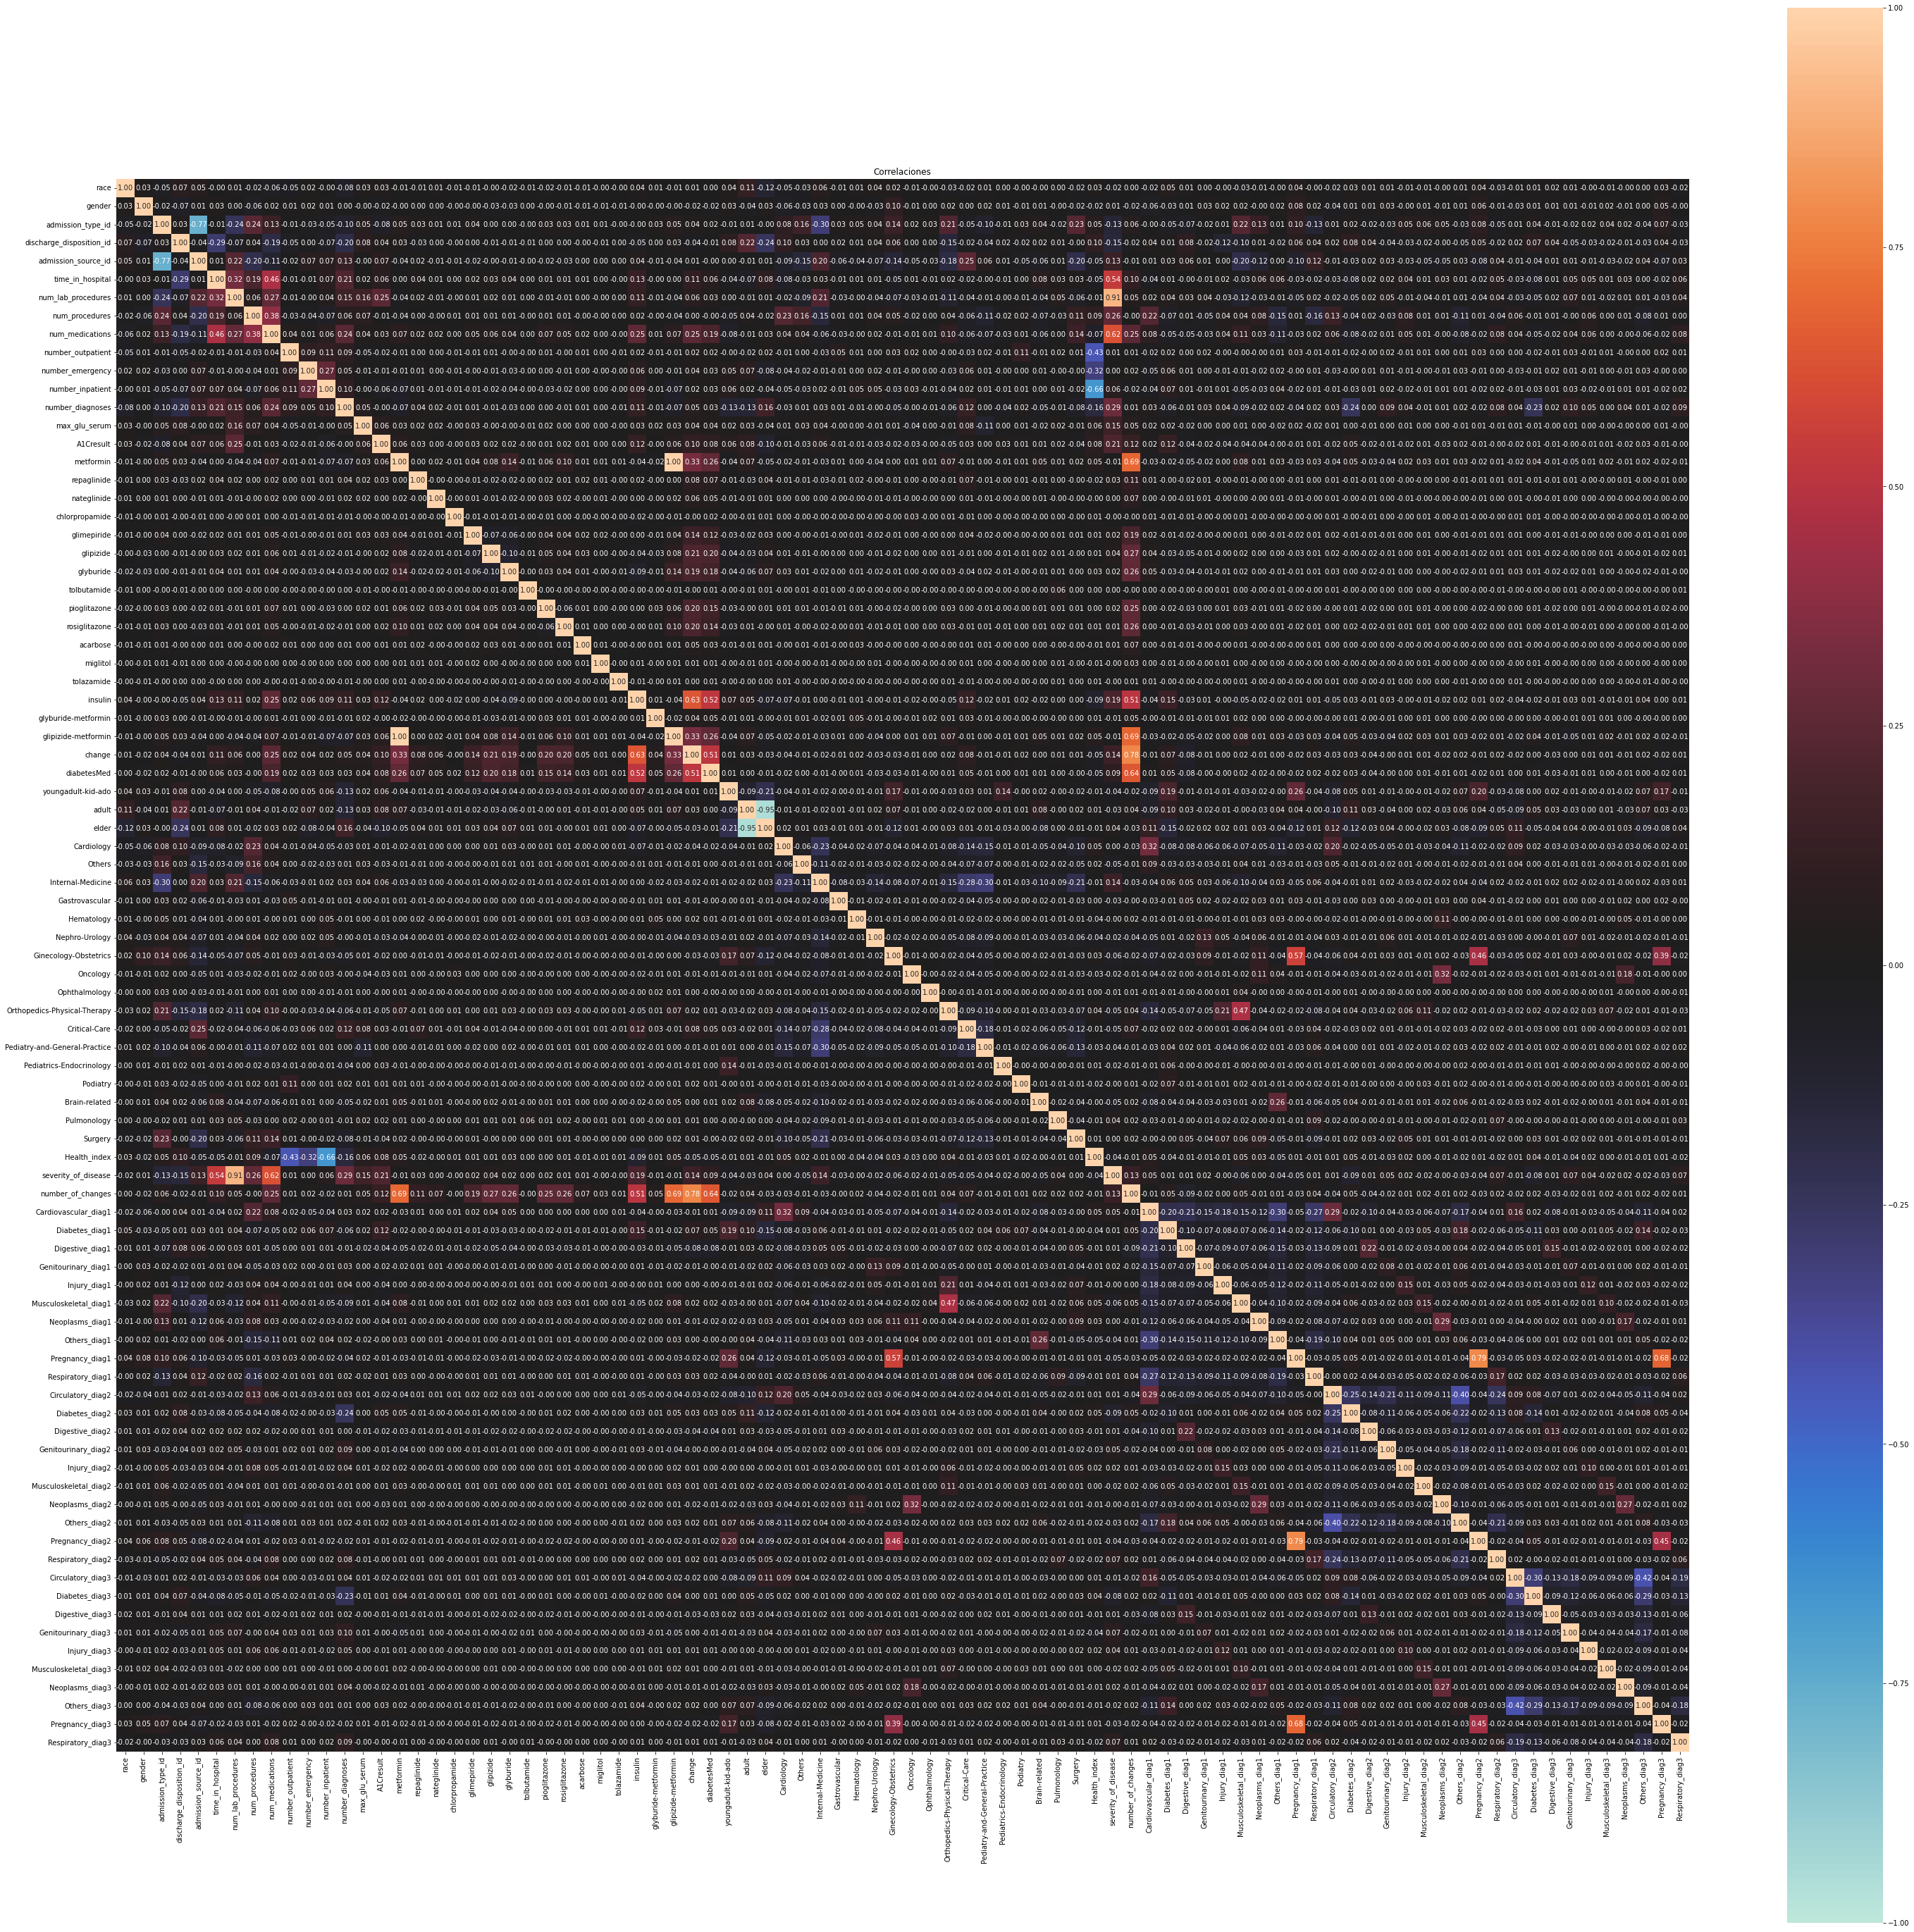

{'corr':                               race    gender  admission_type_id  \
 race                      1.000000  0.034269          -0.049092   
 gender                    0.034269  1.000000          -0.017645   
 admission_type_id        -0.049092 -0.017645           1.000000   
 discharge_disposition_id  0.068824 -0.072025           0.031135   
 admission_source_id       0.047969  0.012527          -0.771071   
 ...                            ...       ...                ...   
 Musculoskeletal_diag3    -0.007024  0.018242           0.036708   
 Neoplasms_diag3          -0.004446 -0.010260           0.017323   
 Others_diag3              0.004772  0.003480          -0.038930   
 Pregnancy_diag3           0.027923  0.051424           0.065660   
 Respiratory_diag3        -0.023083 -0.001647          -0.026819   
 
                           discharge_disposition_id  admission_source_id  \
 race                                      0.068824             0.047969   
 gender               

In [113]:

!pip install dython
from dython.nominal import associations

entrada = csv_file.drop(columns = 'readmitted')
salida = csv_file['readmitted']

associations(entrada, nom_nom_assoc = 'theil', figsize = (50, 50), sv_color = 'greens', title = 'Correlaciones')



# Conclusions after examining Correlation Table.

Admission_type_id  is quite correlated to Admission_source_id (-0.75). Taking into account that the type of admission is probably more important that the type of hospital the patients comes from, we will delete admission_source_id. 

Number of changes is quite correlated to Change (0.78); probably the information they are offering is similar. Nevertheless, we will not delete any of them.    

Pregnancy_diag1 is quite correlated to pregnancy_diag2 (0.78) and pregnancy_diag3 (0.68); we will delete the last two ones, assuming a low probability of losing a baby.   

Severity of disease has a high correlation with num_lab_procedures (0.91); as the first one is more interpretable than the second, we will delete num_lab_procedures.   

Being elder has a correlation of 1 with taking metformin, as well as being adult and taking glipizide-metformin. As a result we will delete elder and adult categories. Besides, being elder has a correlation of 0.88 with being adult (which is very common sensical). As a result, we will only take into account whether the patient is a kid/teenager or not, as the rest are most predicted by other features.


In [114]:
#Executing the changes.
entrada = entrada.drop(columns = 'num_lab_procedures')

entrada = entrada.drop(columns = 'glipizide-metformin')

entrada = entrada.drop(columns = 'adult')

entrada = entrada.drop(columns = 'elder')

entrada = entrada.drop(columns = 'Pregnancy_diag2')

entrada = entrada.drop(columns = 'Pregnancy_diag3')

entrada = entrada.drop(columns = 'admission_source_id')


In [115]:
#Executing our pairplots, using Chi2, mutual_information and ANOVA to see the most important features on training.

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

X_train, X_test, Y_train, Y_test = train_test_split(entrada, salida, test_size = 0.2, random_state = 23)

In [116]:
bestfeatures_Chi2 = SelectKBest(score_func=chi2, k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train, Y_train)

bestfeatures_mutuinf = SelectKBest(score_func=mutual_info_classif, k='all')
fit_mutuinf = bestfeatures_Chi2.fit(X_train, Y_train)

bestfeatures_anova = SelectKBest(score_func=f_classif, k='all')
fit_anova = bestfeatures_Chi2.fit(X_train, Y_train)

df1 = pd.DataFrame({'Nombre_feat':entrada.columns, 'valores':fit_Chi2.scores_})
df2 = pd.DataFrame({'Nombre_feat':entrada.columns, 'valores':fit_mutuinf.scores_})
df3 = pd.DataFrame({'Nombre_feat':entrada.columns, 'valores':fit_anova.scores_})

Text(0.5, 1.0, 'Estadístico chi cuadrado considerando entrenamiento')

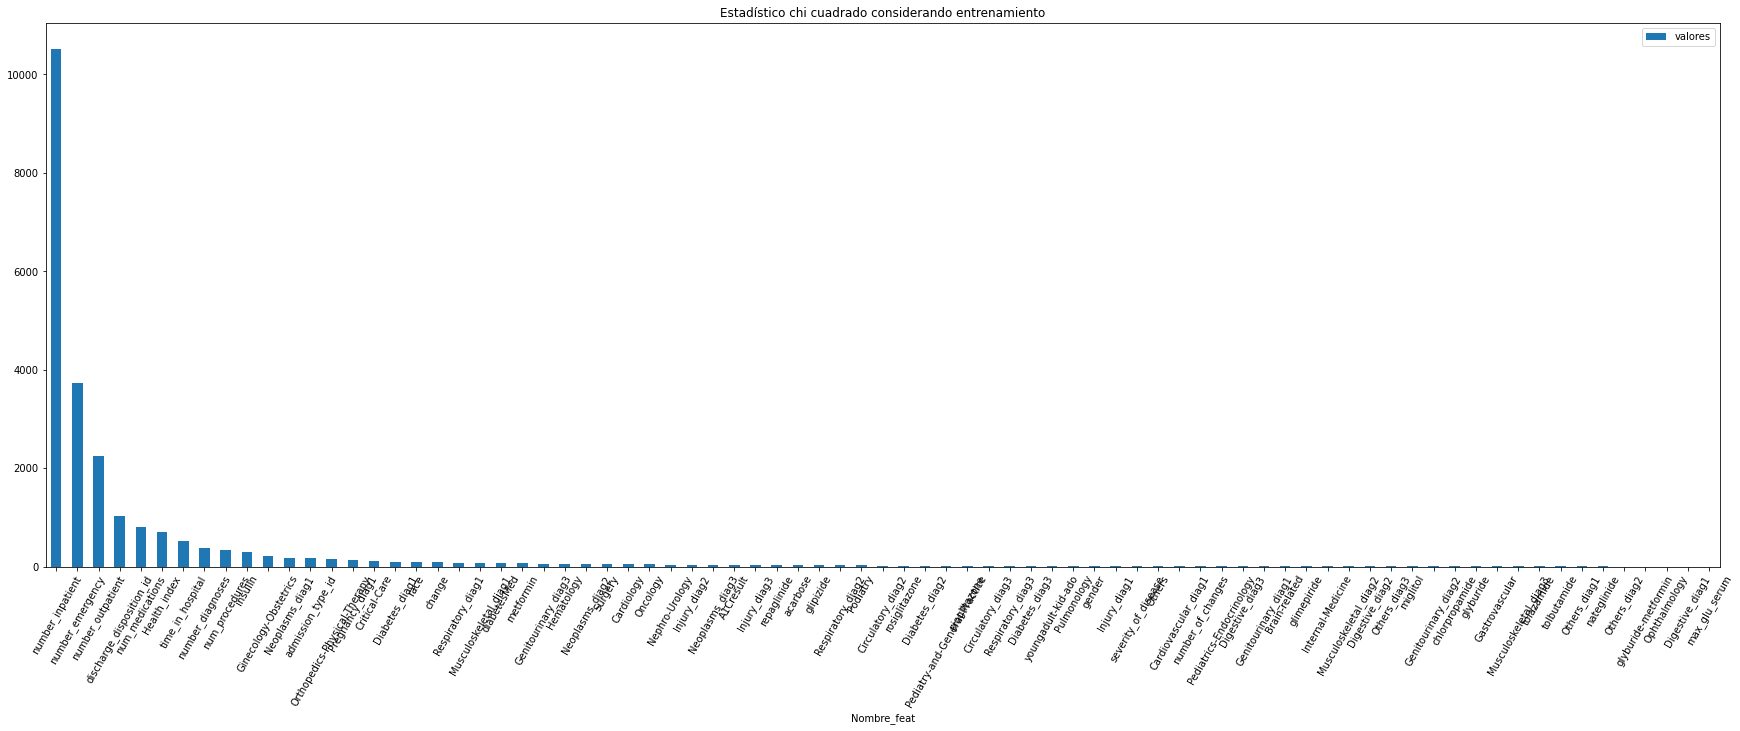

In [117]:
df1 = df1.sort_values('valores', ascending=False)
ax1 = df1.plot.bar(x='Nombre_feat', y='valores', rot=60, figsize=(30, 10))
plt.title('Estadístico chi cuadrado considerando entrenamiento')

Text(0.5, 1.0, 'Estadístico información mutua considerando entrenamiento')

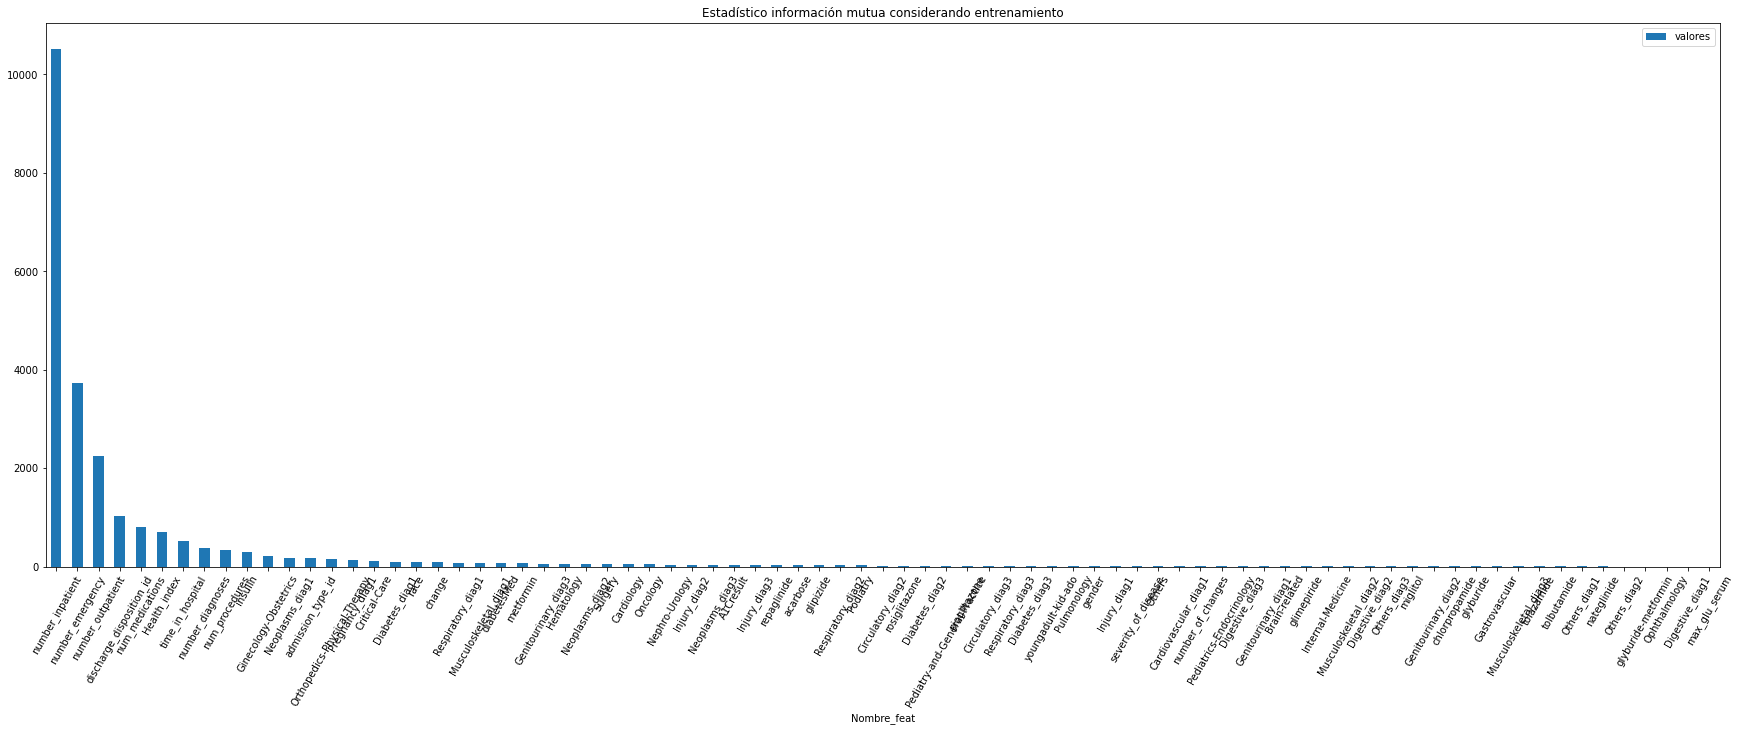

In [118]:
df2 = df2.sort_values('valores', ascending=False)
ax2 = df2.plot.bar(x='Nombre_feat', y='valores', rot=60, figsize=(30, 10))
plt.title('Estadístico información mutua considerando entrenamiento')

Text(0.5, 1.0, 'Estadístico ANOVA considerando entrenamiento')

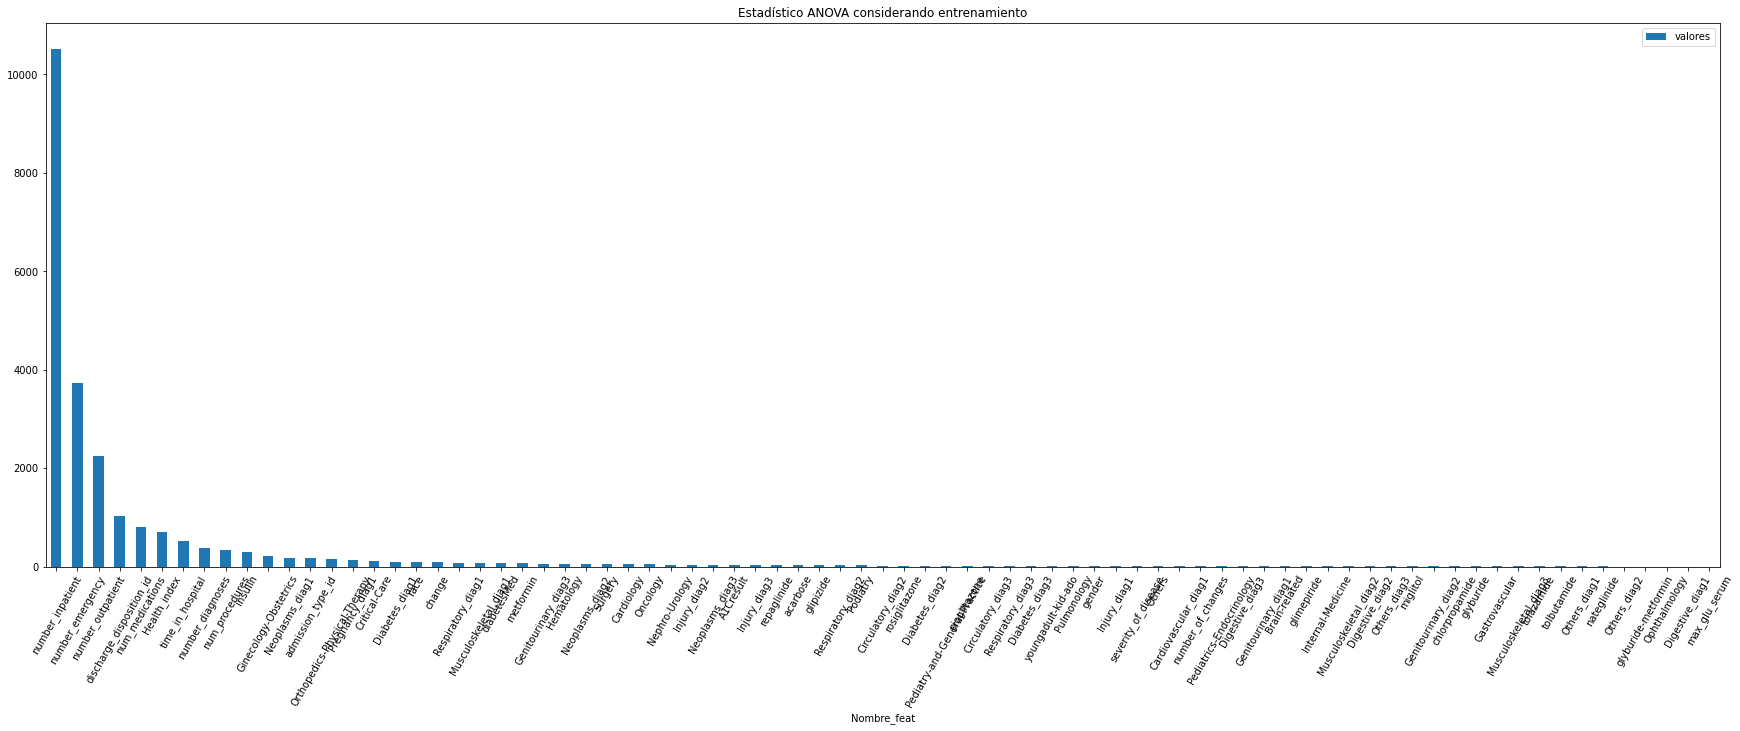

In [119]:
df3 = df3.sort_values('valores', ascending=False)
ax3 = df3.plot.bar(x='Nombre_feat', y='valores', rot=60, figsize=(30, 10))
plt.title('Estadístico ANOVA considerando entrenamiento')

 # Conclusions of the last three algorithms.
 
We can conclude that Internal-Medicine, Others_diag2, glyburide-metformin, Digestive_diag1 and max_glu_serum are not adding any aditional information; as a result, we will not take them into account for our analysis. 

Further improvements could be made with a better analysis of these feature selection graphics to see whether deleting more feature would improve our model performance; as we can see, the features beginning on Oncology are not giving us any relevant information.


In [120]:
entrada = entrada.drop(columns = 'Internal-Medicine')

entrada = entrada.drop(columns = 'Others_diag2')

entrada = entrada.drop(columns = 'glyburide-metformin')

entrada = entrada.drop(columns = 'Digestive_diag1')

In [121]:
entrada = entrada.drop(columns = 'max_glu_serum')

In [122]:
union = [entrada, salida]
csv_file = pd.concat(union, axis = 1)
csv_file.head(10)

,race,gender,admission_type_id,discharge_disposition_id,time_in_hospital,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,Circulatory_diag3,Diabetes_diag3,Digestive_diag3,Genitourinary_diag3,Injury_diag3,Musculoskeletal_diag3,Neoplasms_diag3,Others_diag3,Respiratory_diag3,readmitted
1,0.0,1.0,0.0,7.0,3.0,0.0,18.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,1.0,1.0,0.0,7.0,2.0,5.0,13.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,7.0,2.0,1.0,16.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,7.0,1.0,0.0,8.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,7.0,3.0,6.0,16.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6,0.0,0.0,2.0,7.0,4.0,1.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,7.0,5.0,0.0,12.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8,0.0,1.0,1.0,7.0,13.0,2.0,28.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,1.0,2.0,0.0,12.0,3.0,18.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10,1.0,1.0,0.0,7.0,9.0,2.0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [123]:
#Applying GradientBoosting classifier
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import HistGradientBoostingClassifier


gbdt = HistGradientBoostingClassifier(loss="auto", learning_rate=0.01)

gbdt.fit(X_train, Y_train)

print(gbdt.score(X_test, Y_test))

0.5829466061502372


In [124]:
#Applying DecisionTree classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier(max_depth =3, random_state = 23)

clf1.fit(X_train, Y_train)
print(clf1.score(X_test, Y_test))

0.5672905298587383


In [125]:
#Applying AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
clf2 = AdaBoostClassifier(n_estimators=100, random_state = 23)
clf2.fit(X_train, Y_train)
print(clf2.score(X_test, Y_test))

0.5839665459737875


In [126]:
#Testing on a new feature subset, taking the first 10 more important features.

new_dataset = csv_file[['number_inpatient', 'number_emergency', 'number_outpatient', 'discharge_disposition_id', 'num_medications', 
                        'Health_index', 'time_in_hospital', 'number_diagnoses', 'num_procedures', 'insulin', 'readmitted']]

entrada_new = new_dataset.drop(columns = 'readmitted')
salida_new = new_dataset['readmitted']
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(entrada_new, salida_new, test_size = 0.2, random_state = 23)

In [127]:
#Applying GradientBoosting classifier
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier


gbdt = GradientBoostingClassifier(learning_rate=0.01, random_state = 23)

gbdt.fit(X_train_new, Y_train_new)

print(gbdt.score(X_test_new, Y_test_new))

0.5734611657912183


In [128]:
#Applying DecisionTree classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier(max_depth =3, random_state = 23)

clf1.fit(X_train_new, Y_train_new)

print(clf1.score(X_test_new, Y_test_new))

0.5672905298587383


In [129]:
#Applying AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
clf2 = AdaBoostClassifier(n_estimators=100, random_state = 23)
clf2.fit(X_train_new, Y_train_new)
print(clf2.score(X_test_new, Y_test_new))

0.5774389311030649


In [130]:
#As we can see, the results are more similar being the dataset much smaller; we have improved in terms of
#time of computation.



In [131]:
#Applying LogisticRegression

from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(multi_class='multinomial', solver='saga')


lm.fit(X_train_new, Y_train_new)


print(lm.score(X_test_new, Y_test_new))


0.5730531898617982


In [132]:
#Applying Perceptron
from sklearn.neural_network import MLPClassifier


clf5 = MLPClassifier(random_state=23, max_iter=300, learning_rate = 'adaptive', solver = 'adam')


clf5.fit(X_train_new, Y_train_new)

print(clf5.score(X_test_new, Y_test_new))

0.5795808047325208


In [133]:
#Applying Stochastic Gradient Descent.
from sklearn.linear_model import SGDClassifier

sgdc1 = SGDClassifier(loss = 'log', random_state = 23, learning_rate = 'adaptive', eta0 = 0.01) #eta es donde empieza el parámetro de aprendizaje.


sgdc1.fit(X_train_new, Y_train_new)


print(sgdc1.score(X_test_new, Y_test_new))

0.5731551838441532


In [134]:
#Applying Naive Bayes.
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_new, Y_train_new)

print(nb.score(X_test_new, Y_test_new))

0.5608139119791933


In [135]:
#Applying Random Forests.
from sklearn.ensemble import RandomForestClassifier


rf1 = RandomForestClassifier(n_estimators=200, criterion = 'entropy', random_state = 23, n_jobs = -1, class_weight = 'balanced')


rf1.fit(X_train_new, Y_train_new)

print(rf1.score(X_test_new, Y_test_new))

0.5002804834514764


In [136]:
#Applying XGBoost.
from xgboost import XGBClassifier

model2 = XGBClassifier(validate_parameters = False, eta = 0.01, tree_method = 'hist', scale_pos_weight = 1.2, max_delta_step = 1, 
                       max_bin = 512, predictor = 'gpu_predictor', objective = 'multi:softprob', eval_metric = 'logloss', seed = 23)

model2.fit(X_train_new, Y_train_new)


print(model2.score(X_test_new, Y_test_new))

0.5398541486052323


In [137]:
#We will know generate a table on which we will include all the data generated with the classifiers.
from sklearn import metrics
#Gradient Boosting
print('Gradient Boosting')
print('Accuracy', gbdt.score(X_test_new, Y_test_new))
y_pred1 = gbdt.predict_proba(X_test_new)
y_pred11 = gbdt.predict(X_test_new)
print('AUC', metrics.roc_auc_score(Y_test_new, y_pred1, multi_class = 'ovo', average = 'weighted'))
print('F1-score', metrics.f1_score(Y_test_new, y_pred11, average = 'weighted'))
print('Recall', metrics.recall_score(Y_test_new, y_pred11, average = 'weighted'))

scores_gb = [gbdt.score(X_test_new, Y_test_new), metrics.roc_auc_score(Y_test_new, y_pred1, multi_class = 'ovo', average = 'weighted'), 
              metrics.f1_score(Y_test_new, y_pred11, average = 'weighted'), metrics.recall_score(Y_test_new, y_pred11, average = 'weighted')]
#TreeClassifiers
print('Árboles de decisión')
print(clf1.score(X_test_new, Y_test_new))
y_pred2 = clf1.predict_proba(X_test_new)
y_pred22 = clf1.predict(X_test_new)
print('AUC', metrics.roc_auc_score(Y_test_new, y_pred2, multi_class = 'ovo', average = 'weighted'))
print('F1-score', metrics.f1_score(Y_test_new, y_pred22, average = 'weighted'))
print('Recall', metrics.recall_score(Y_test_new, y_pred22, average = 'weighted'))

scores_ad = [clf1.score(X_test_new, Y_test_new), metrics.roc_auc_score(Y_test_new, y_pred2, multi_class = 'ovo', average = 'weighted'), 
              metrics.f1_score(Y_test_new, y_pred22, average = 'weighted'), metrics.recall_score(Y_test_new, y_pred22, average = 'weighted')]
#AdaBoost
print('AdaBoost')
print(clf2.score(X_test_new, Y_test_new))
y_pred3 = clf2.predict_proba(X_test_new)
y_pred33 = clf2.predict(X_test_new)
print('AUC', metrics.roc_auc_score(Y_test_new, y_pred3, multi_class = 'ovo', average = 'weighted'))
print('F1-score', metrics.f1_score(Y_test_new, y_pred33, average = 'weighted'))
print('Recall', metrics.recall_score(Y_test_new, y_pred33, average = 'weighted'))

scores_ab = [clf2.score(X_test_new, Y_test_new), metrics.roc_auc_score(Y_test_new, y_pred3, multi_class = 'ovo', average = 'weighted'), 
              metrics.f1_score(Y_test_new, y_pred33, average = 'weighted'), metrics.recall_score(Y_test_new, y_pred33, average = 'weighted')]
#LogisticRegression
print('Regresión Logística')
print(lm.score(X_test_new, Y_test_new))
y_pred4 = lm.predict_proba(X_test_new)
y_pred44 = lm.predict(X_test_new)
print('AUC', metrics.roc_auc_score(Y_test_new, y_pred4, multi_class = 'ovo', average = 'weighted'))
print('F1-score', metrics.f1_score(Y_test_new, y_pred44, average = 'weighted'))
print('Recall', metrics.recall_score(Y_test_new, y_pred44, average = 'weighted'))

scores_rl = [lm.score(X_test_new, Y_test_new), metrics.roc_auc_score(Y_test_new, y_pred4, multi_class = 'ovo', average = 'weighted'), 
              metrics.f1_score(Y_test_new, y_pred44, average = 'weighted'), metrics.recall_score(Y_test_new, y_pred44, average = 'weighted')]
#Perceptron
print('Perceptrón')
print(clf5.score(X_test_new, Y_test_new))
y_pred5 = clf5.predict_proba(X_test_new)
y_pred55 = clf5.predict(X_test_new)
print('AUC', metrics.roc_auc_score(Y_test_new, y_pred5, multi_class = 'ovo', average = 'weighted'))
print('F1-score', metrics.f1_score(Y_test_new, y_pred55, average = 'weighted'))
print('Recall', metrics.recall_score(Y_test_new, y_pred55, average = 'weighted'))

scores_p = [clf5.score(X_test_new, Y_test_new), metrics.roc_auc_score(Y_test_new, y_pred5, multi_class = 'ovo', average = 'weighted'), 
              metrics.f1_score(Y_test_new, y_pred55, average = 'weighted'), metrics.recall_score(Y_test_new, y_pred55, average = 'weighted')]
#StochasticGradientDescent
print('Descenso por gradiente estocástico')
print(sgdc1.score(X_test_new, Y_test_new))
y_pred6 = sgdc1.predict_proba(X_test_new)
y_pred66 = sgdc1.predict(X_test_new)
print('AUC', metrics.roc_auc_score(Y_test_new, y_pred6, multi_class = 'ovo', average = 'weighted'))
print('F1-score', metrics.f1_score(Y_test_new, y_pred66, average = 'weighted'))
print('Recall', metrics.recall_score(Y_test_new, y_pred66, average = 'weighted'))

scores_sgdc = [sgdc1.score(X_test_new, Y_test_new), metrics.roc_auc_score(Y_test_new, y_pred6, multi_class = 'ovo', average = 'weighted'), 
              metrics.f1_score(Y_test_new, y_pred66, average = 'weighted'), metrics.recall_score(Y_test_new, y_pred66, average = 'weighted')]
#Naive Bayes
print('Naive Bayes')
print(nb.score(X_test_new, Y_test_new))
y_pred7 = nb.predict_proba(X_test_new)
y_pred77 = nb.predict(X_test_new)
print('AUC', metrics.roc_auc_score(Y_test_new, y_pred7, multi_class = 'ovo', average = 'weighted'))
print('F1-score', metrics.f1_score(Y_test_new, y_pred77, average = 'weighted'))
print('Recall', metrics.recall_score(Y_test_new, y_pred77, average = 'weighted'))

scores_nb = [nb.score(X_test_new, Y_test_new), metrics.roc_auc_score(Y_test_new, y_pred7, multi_class = 'ovo', average = 'weighted'), 
              metrics.f1_score(Y_test_new, y_pred77, average = 'weighted'), metrics.recall_score(Y_test_new, y_pred77, average = 'weighted')]
#Random Forests
print('Random Forests')
print(rf1.score(X_test_new, Y_test_new))
y_pred8 = rf1.predict_proba(X_test_new)
y_pred88 = rf1.predict(X_test_new)
print('AUC', metrics.roc_auc_score(Y_test_new, y_pred8, multi_class = 'ovo', average = 'weighted'))
print('F1-score', metrics.f1_score(Y_test_new, y_pred88, average = 'weighted'))
print('Recall', metrics.recall_score(Y_test_new, y_pred88, average = 'weighted'))

scores_rf = [rf1.score(X_test_new, Y_test_new), metrics.roc_auc_score(Y_test_new, y_pred8, multi_class = 'ovo', average = 'weighted'), 
              metrics.f1_score(Y_test_new, y_pred88, average = 'weighted'), metrics.recall_score(Y_test_new, y_pred88, average = 'weighted')]

Gradient Boosting
Accuracy 0.5734611657912183
AUC 0.6387144848212557
F1-score 0.48972452913865366
Recall 0.5734611657912183
Árboles de decisión
0.5672905298587383
AUC 0.6216865735920325
F1-score 0.4866953844956793
Recall 0.5672905298587383
AdaBoost
0.5774389311030649
AUC 0.6467488781906459
F1-score 0.5256740507854009
Recall 0.5774389311030649
Regresión Logística
0.5730531898617982
AUC 0.6333531501575633
F1-score 0.5152386934318982
Recall 0.5730531898617982
Perceptrón
0.5795808047325208
AUC 0.6487590329473373
F1-score 0.5394181419439349
Recall 0.5795808047325208
Descenso por gradiente estocástico
0.5731551838441532
AUC 0.6329945130067418
F1-score 0.5181116275768481
Recall 0.5731551838441532
Naive Bayes
0.5608139119791933
AUC 0.6283621844859922
F1-score 0.5019988623245408
Recall 0.5608139119791933
Random Forests
0.5002804834514764
AUC 0.5785389706584717
F1-score 0.49522336113978116
Recall 0.5002804834514764


In [139]:
from tabulate import tabulate

info_tabla={"Figura de mérito":["Accuracy", "AUC", "F1-score", "Recall"], "Gradient Boosting":[scores_gb[0], scores_gb[1], scores_gb[2], scores_gb[3]], "Árboles Decisión":[scores_ad[0],scores_ad[1],scores_ad[2],scores_ad[3]],
            "AdaBoost":[scores_ab[0],scores_ab[1],scores_ab[2],scores_ab[3]], "Regresión Logística":[scores_rl[0],scores_rl[1],scores_rl[2],scores_rl[3]], "Perceptrón":[scores_p[0],scores_p[1],scores_p[2],scores_p[3]], 
            "Stochastic Gradient Boosting":[scores_sgdc[0],scores_sgdc[1],scores_sgdc[2],scores_sgdc[3]], "Naive Bayes":[scores_nb[0],scores_nb[1],scores_nb[2],scores_nb[3]], "Random Forests":[scores_rf[0],scores_rf[1],scores_rf[2],scores_rf[3]]}

print(tabulate(info_tabla, headers="keys", tablefmt="fancy_grid"))

╒════════════════════╤═════════════════════╤════════════════════╤════════════╤═══════════════════════╤══════════════╤════════════════════════════════╤═══════════════╤══════════════════╕
│ Figura de mérito   │   Gradient Boosting │   Árboles Decisión │   AdaBoost │   Regresión Logística │   Perceptrón │   Stochastic Gradient Boosting │   Naive Bayes │   Random Forests │
╞════════════════════╪═════════════════════╪════════════════════╪════════════╪═══════════════════════╪══════════════╪════════════════════════════════╪═══════════════╪══════════════════╡
│ Accuracy           │            0.573461 │           0.567291 │   0.577439 │              0.573053 │     0.579581 │                       0.573155 │      0.560814 │         0.50028  │
├────────────────────┼─────────────────────┼────────────────────┼────────────┼───────────────────────┼──────────────┼────────────────────────────────┼───────────────┼──────────────────┤
│ AUC                │            0.638714 │           0.621687 │   0.

# Limitations:

It would be useful to see whether a better feature selection is more proper (MRMR methods e.g.); perhaps we should search a better way to adjust faster the hyperparameters for each model. We could use try more complex neural networks to see whether we are improving our results.
